In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import flexiblecc as fcc
from flexiblecc.Metrics import voronoi

In [3]:
import numpy as np
import cv2

In [4]:
import matplotlib.pyplot as plt

# CV2 Using 14 parameters

In [12]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, obj_points, img_points = np.load("cal_out.npy", allow_pickle=True)

In [13]:
distCoeffs

array([[ 2.03288270e+00,  4.52548448e+01, -7.73226736e-03,
         1.80779861e-02, -1.47886929e+02,  2.09683329e+00,
         4.65342697e+01, -1.51419436e+02, -1.83082177e-02,
        -1.92297600e-03,  9.86103858e-03,  7.83822797e-03,
         6.18311558e-03,  3.67951499e-02]])

In [14]:
img_points_all = []
angels_all = []
diff_all = []
for i in range(len(img_points)):
    # Finder residualvektore
    repor_img_points, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    diff = img_points[i] - repor_img_points
    diff = diff.reshape(-1,2)
    
    # Finder vinklen mellem de projecteret pointer
    angels = np.array([np.angle(el[0] + el[1] * 1j, deg=True) for el in diff])
    neg_angels = np.where(angels < 0)[0]
    angels[neg_angels] = 360 + angels[neg_angels]
    
    # Ligger det hele ind i lister
    img_points_all.append(img_points[i])
    diff_all.append(diff)
    angels_all.append(angels)
    
diff_all = np.concatenate(diff_all).reshape(-1,2)
img_points_all = np.concatenate(img_points_all).reshape(-1,2)
angels_all = np.concatenate(angels_all).flatten()

## Angel

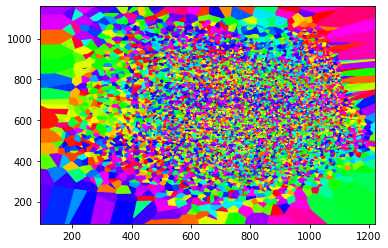

In [16]:
voronoi.plot_voronoi(img_points_all, angels_all)  # angels_all

## l2

In [21]:
ambi = np.linalg.norm(diff_all, axis=1)
ambi_norm = (ambi - ambi.min())/(ambi.max() - ambi.min())
ambi_360 = ambi_norm * 360

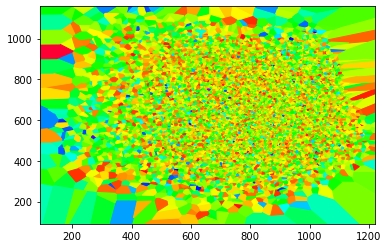

In [22]:
voronoi.plot_voronoi(img_points_all, ambi_360) 

# CV2 using 5 parameters

In [24]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, obj_points, img_points = np.load("cal_out_low.npy", allow_pickle=True)

In [29]:
distCoeffs

array([[-6.81993229e-02, -1.02587054e+00,  1.08143750e-03,
        -3.12251987e-04,  6.95283127e+00]])

In [25]:
img_points_all = []
angels_all = []
diff_all = []
for i in range(len(img_points)):
    # Finder residualvektore
    repor_img_points, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    diff = img_points[i] - repor_img_points
    diff = diff.reshape(-1,2)
    
    # Finder vinklen mellem de projecteret pointer
    angels = np.array([np.angle(el[0] + el[1] * 1j, deg=True) for el in diff])
    neg_angels = np.where(angels < 0)[0]
    angels[neg_angels] = 360 + angels[neg_angels]
    
    # Ligger det hele ind i lister
    img_points_all.append(img_points[i])
    diff_all.append(diff)
    angels_all.append(angels)
    
diff_all = np.concatenate(diff_all).reshape(-1,2)
img_points_all = np.concatenate(img_points_all).reshape(-1,2)
angels_all = np.concatenate(angels_all).flatten()

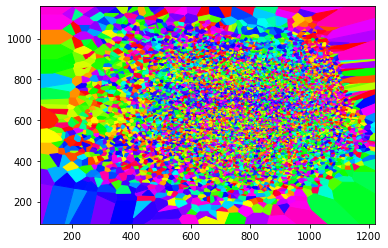

In [26]:
voronoi.plot_voronoi(img_points_all, angels_all)  # angels_all

In [27]:
ambi = np.linalg.norm(diff_all, axis=1)
ambi_norm = (ambi - ambi.min())/(ambi.max() - ambi.min())
ambi_360 = ambi_norm * 360

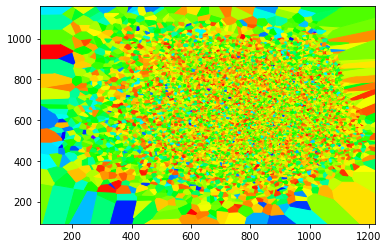

In [28]:
voronoi.plot_voronoi(img_points_all, ambi_360) 

# Central Model plots

In [19]:
%matplotlib qt

In [20]:
from flexiblecc.BundleAdjustment.central_model import CentralModel
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import uuid
from PIL import Image
import glob
import shutil

In [21]:
from flexiblecc.Metrics.centralmodel import make_cm_vec_plot, make_cm_vec_plot_gif

In [22]:
image_dimensions = (500,500)
grid_dimensions = (700,700)
control_points = np.abs(np.random.randn(10,10,3))*5
order = 3

cm = CentralModel(image_dimensions, grid_dimensions, control_points, order)

image_dimensions_step = 30
gif_file_out = "agif.gif"

In [23]:
make_cm_vec_plot(cm, image_dimensions_step)

In [26]:
make_cm_vec_plot_gif(cm, image_dimensions_step, gif_file_out, azim_start=0, azim_end=360, 
                     azim_step=5, elev_start=0, elev_end=90, elev_step=10, show=False)

# Stats thinks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib qt

In [16]:
from flexiblecc.Metrics import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
arr = np.random.randint(0, 500, size=(100,4))

In [18]:
stats.plot_model_check(arr, violinplot=True)

In [29]:
mean, cov = stats.mean_cov(arr)

In [18]:
stats.plot_3DMVN(mean, cov, 0, 500, 1000)

In [16]:
stats.zero_mean_test(arr)

1.1102230246251565e-16

In [27]:
stats.arr_correlation_test(arr, nonparametric=False, plot=True, plot_critical_value=0.05)

({(0, 1): 0.41018380697053336,
  (0, 2): 0.5901750011880004,
  (0, 3): 0.09752579923695748,
  (1, 2): 0.3343070621484534,
  (1, 3): 0.9078031155108099,
  (2, 3): 0.9406358545922965},
 <matplotlib.axes._subplots.AxesSubplot at 0x1adbb84fe08>)

In [77]:
#spearmanr() # nonparametric
#pearsonr() # parametric: normally distributed




# ChArUco

In [1]:
%matplotlib qt
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import shutil
from tqdm import tqdm
from flexiblecc.Metrics import voronoi, distorsion
import flexiblecc
import random

In [5]:
squaresX = 28
squaresY = 19
squareLength = 0.01
markerLength = 0.0075 #Skal tjekkes
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)#Skal tjekkes (DICT_4X4_100)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

In [6]:
base_folder = r"CalImgs\ChArUco\S10PW\Fold_0"

test_img_files = base_folder+"/*.jpg"
files = glob.glob(test_img_files)
files = random.sample(files, 30)


test_imgs = [cv2.imread(f) for f in tqdm(files)]
test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in tqdm(test_imgs)]

#test_imgs_gray = [cv2.resize(img, None, fx=0.3, fy=0.3) for img in tqdm(test_imgs_gray)]
img_shape = test_imgs[0].shape[:2]

folder_out = base_folder+"/out"
os.makedirs(folder_out)

draw = False

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 240.69it/s]


In [18]:
test_imgs_gray[0].shape

(4032, 3024)

In [7]:
calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary)

In [7]:
np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])

In [25]:
calibrate_retval

0.8405466019811173

In [26]:
cameraMatrix

array([[963.95014692,   0.        , 483.3806189 ],
       [  0.        , 959.82590874, 567.61971334],
       [  0.        ,   0.        ,   1.        ]])

In [27]:
distCoeffs

array([[ 1.05544756e-02,  1.64142238e-01,  1.34831467e-02,
        -2.84215699e-03,  3.12468094e+00, -1.20710628e-01,
         7.97724919e-01,  2.29107616e+00,  4.28952216e-03,
        -7.63772845e-05, -1.34157637e-02,  5.49976001e-04,
        -5.58622215e-02, -3.68966097e-02]])

In [24]:
img_points_all, diff_all, angels_all, mag_all = voronoi.cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)

In [37]:
plt.figure()
voronoi.plot_voronoi(img_points_all, angels_all)
plt.show()

In [71]:
def undistort(points):
    return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)

In [72]:
flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20)

In [39]:
def Rt_from_rvec_tvec(rvec, tvec):
    R, _ = cv2.Rodrigues(rvec)

    Rt = np.zeros(shape=(4,4))
    Rt[:3, :3] = R
    Rt[:-1, 3] = tvec.flatten()
    Rt[-1,-1] = 1
    return Rt

def _do_homogeneous_Rt(p, Rt):
    if p.shape[0] == 3:
        temp = np.ones(4)
        temp[:3] = p
        p = temp
    assert p.shape[0] == 4, "The shape pf p has to be 3 or 4 for each point"

    new_p = np.matmul(Rt,p)
        
    new_p_uh = new_p[:3]
    new_p_uh = new_p_uh / new_p[-1]

    return new_p_uh

def do_homogeneous_Rt(p, Rt):
    if len(p.shape) == 1:
        new_ps = _do_homogeneous_Rt(p, Rt)
    else:
        new_ps = np.array([_do_homogeneous_Rt(p_el, Rt) for p_el in p])
    return new_ps

In [41]:
ps = board.chessboardCorners
npss = []

for idx in range(len(charucoCorners_all)):
    rvec, tvec = rvecs[idx], tvecs[idx]
    Rt = Rt_from_rvec_tvec(rvec, tvec)
    nps = do_homogeneous_Rt(ps, np.linalg.inv(Rt))
    npss.append(nps)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.scatter(0,0,0)
for nps in npss:
    ax.scatter(nps[:,0],nps[:,1],nps[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.view_init(elev=90, azim=0)
plt.pause(0.001)

# Split images

In [1]:
import glob
import numpy as np
import os
import shutil

In [20]:
base_folder = r"S:\Programming\Studet\FCC\CalImgs\ChArUco\Samsung Galaxy S10 Plus\WideAngle"
files = glob.glob(os.path.join(base_folder, "*.JPG"))
np.random.shuffle(files)
n_folds = 6

In [21]:
folds = np.array_split(files, n_folds)

In [22]:
for i, fold in enumerate(folds):
    if i < n_folds-1:
        fold_folder = os.path.join(base_folder, "Fold_{}".format(i))
    else:
        fold_folder = os.path.join(base_folder, "Test".format(i))
        
    os.makedirs(fold_folder)
    
    for f in fold:
        shutil.move(f, os.path.join(fold_folder, os.path.basename(f)))

# Cal folders

In [1]:
import sys
sys.path.append("../")

In [2]:
import flexiblecc
import numpy
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import click

In [3]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

detectorParameters = cv2.aruco.DetectorParameters_create()

#detectorParameters.adaptiveThreshWinSizeStep = 5
#detectorParameters.adaptiveThreshWinSizeMin = 3
#detectorParameters.adaptiveThreshWinSizeMax = 10

detectorParameters.minOtsuStdDev = 12 #even more errors 3, many errors 5 (def), many errors 7, many errors 8, one error 9, No error 10, No error & no extra loss of points 12
# 12 no loss on not quarantined imags

In [4]:
folders = []
#folders = glob.glob(r"../CalImgs\ChArUco - Copy\InitTest/*")
#folders += [r"../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
#folders += glob.glob(r"../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
folders += glob.glob(r"../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm/*/*")
folders += glob.glob(r"../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus/*/*")

#folders += glob.glob(r"../CalImgs\ChArUco\Samsung Galaxy S10 Plus\WideAngle\Fold_1")
print(folders)

['../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Fold_0', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Fold_1', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Fold_2', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Fold_3', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Fold_4', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\300mm\\Test', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Fold_0', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Fold_1', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Fold_2', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Fold_3', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Fold_4', '../CalImgs\\ChArUco - Copy\\NikonD3100\\AF-S NIKKOR 55-300mm\\55mm\\Test', '../CalImgs\\ChArUco - Copy\\Samsung Galaxy S10 Plus\\Telepho

In [5]:
for folder in tqdm(folders):
    print(folder)
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    q_folder = os.path.join(folder,"quarantined")
    os.makedirs(q_folder, exist_ok=True)
    
    test_img_files = folder+"/*.jpg"
    files = np.array(glob.glob(test_img_files))
    
    base_files = np.array([os.path.basename(f) for f in files])
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs])
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
        armarkerIds_all, obj_points_all, board, not_used = flexiblecc.Parametric.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary, detectorParameters=detectorParameters)
    
    for f in files[not_used]:
        shutil.move(f, q_folder)
    
    files = np.delete(files, not_used)
    base_files = np.delete(base_files, not_used)
    idx = np.delete(np.arange(0,len(test_imgs_gray)), not_used)
    test_imgs_gray = test_imgs_gray[idx]
    
    print(f"""RMS: {calibrate_retval:0.4f},(mean, std): ({perViewErrors.mean():0.4f}, {perViewErrors.std():0.4f}), (min, max): ({perViewErrors.min():0.4f}, {perViewErrors.max():0.4f}),
    """, perViewErrors.flatten())
    
    treshold = click.prompt("treshold: ", type=float)
    
    if treshold <= perViewErrors.max():
        b_treshold = perViewErrors.flatten() <= treshold
        test_imgs_gray = test_imgs_gray[b_treshold]
        
        
        np.save(os.path.join(folder_out, "image_order.npy"), np.array(base_files)[b_treshold])

        calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
            armarkerIds_all, obj_points_all, board, not_used = flexiblecc.Parametric.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary, detectorParameters=detectorParameters)
        
        print(f"New RMS: {calibrate_retval:0.5f}")
        b_remove = np.invert(b_treshold)
        
        f_remove = np.array(files)[b_remove]
        for f in f_remove:
            shutil.move(f, q_folder)
    
    if treshold > perViewErrors.max():
        treshold = "Off"
    with open(os.path.join(folder_out,f"Error threshold {treshold}"), "w") as f:
        f.write(f"Error threshold: {treshold}")
    
    np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])
    
    img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.projectPoints_and_cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
    with open(os.path.join(folder_out,f"Parametric RMS {calibrate_retval:0.5f}"), "w") as f:
        f.write(f"Parametric RMS: {calibrate_retval:0.5f}")
    
    plt.figure()
    flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
    plt.savefig(os.path.join(folder_out, "voronoi.svg"))
    plt.close()
    
    def undistort(points):
        return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)
    flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20,save_f_string=os.path.join(folder_out, "{}.svg"))
    
    plt.figure()
    for i, coners in enumerate(charucoCorners_all):
        plt.scatter(coners[:,0,0], coners[:,0,1], s=1)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.savefig(os.path.join(folder_out, "cover.svg"))
    plt.close()

  0%|                                                                                                                                                                                                                                            | 0/30 [00:00<?, ?it/s]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Fold_0
RMS: 19.7449,(mean, std): (8.4888, 40.2094), (min, max): (0.1667, 270.8117),
     [1.98544072e+00 1.98228106e+00 1.92009147e+00 1.82432123e+00
 1.43056456e+00 1.13393129e+00 3.23678287e+00 7.98354227e-01
 9.68024459e-01 1.15396902e+00 1.24815932e+00 1.24869966e+00
 1.16117252e+00 1.22599328e+00 1.07128667e+00 1.27410415e+00
 1.15554566e+00 1.34344476e+00 1.29107056e+00 1.36478183e+00
 1.42815728e+00 1.26098449e+00 1.39279800e+00 1.31844400e+00
 1.23090218e+00 1.27790543e+00 1.23793489e+00 1.44289687e+00
 1.35964415e+00 1.23630421e+00 1.00829132e+00 2.58536332e+02
 2.70811667e+02 1.16412877e+00 4.00960831e+00 3.83223585e+00
 3.71034857e+00 1.04613104e+00 1.42779286e+00 1.41479105e+02
 1.21966429e+00 1.19419315e+00 1.40691330e+00 1.45905080e+00
 1.36234198e+00 1.49760847e+00 1.25820438e+00 1.30236859e+00
 1.26048397e+00 1.30766507e+00 1.53579962e+00 1.39722385e+00
 9.64354054e-01 1.66666276e-01 1.06403633e+00 1.489738

 4


New RMS: 2.42450


  3%|███████▌                                                                                                                                                                                                                         | 1/30 [05:28<2:38:56, 328.85s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Fold_1
RMS: 20.8313,(mean, std): (23.4149, 77.8027), (min, max): (1.3528, 633.1269),
     [ 10.64664702  12.84474953   6.88168268   5.98378363   5.28569898
   5.6184446    4.38466357   3.78389871   4.15401962   4.22395474
   4.65103505   5.1725655    4.67025541   5.04020112   6.22330021
   6.61992738   5.64033595   7.7860754    9.64603619  10.12352821
  10.63185983  10.72164729  14.16150594  11.56059391  13.8411056
  17.04490599  13.90656875  19.17387251  18.65846572   7.09761428
   2.49274746  16.97383743  12.92893347 206.22591024 131.33739668
 342.37354253   2.52064029   1.64328662   1.64284721   1.35277005
   5.16423728   6.59695462   5.71872254   7.82286391   1.87841143
   3.08853185  14.13939633  16.03677443  12.77739294  14.30110079
  11.22612452  12.2199871   14.02943848   4.4520417    4.91410733
   3.88466419   4.31697526   5.32887632   4.26855829   5.04419904
   5.0464895    4.36252507   5.29813667   7.18931345   

 20


New RMS: 4.73356


  7%|███████████████                                                                                                                                                                                                                  | 2/30 [17:14<3:26:16, 442.03s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Fold_2
RMS: 19.4852,(mean, std): (18.7937, 43.2178), (min, max): (1.6524, 288.9357),
     [ 28.55291403  26.09944312  17.84726765  13.86350052   8.36453883
   7.41201322   7.85246921   6.0532354    5.69565374   4.75157853
   5.50946384   5.21372118   4.62890846   4.47989557   6.38783832
   4.01973091   4.65268291   4.88080387   4.16008134   5.34451408
  12.4670711   11.48535786   9.12576563  13.82875145  14.98325915
  17.18942615  20.99765763  21.92564558  25.31945916  17.12183688
  18.0864512    8.09225167 288.93571898   6.71831747  15.31214857
 133.03741519   6.89639556   4.19794619   2.77134707 162.04631707
   1.65243891   4.41074093   8.373928     9.80774819  10.75924044
 252.36671277   7.59379922   1.98126114  23.31304657  14.63266733
  18.46387986  11.65835199  11.93057318   9.12729758  17.04754534
  19.17384909  15.81235111  11.35865743   8.75947259  17.62071136
   7.97986313   7.90729065  14.81261747  12.35394726  

 25


New RMS: 1.41173


 10%|██████████████████████▌                                                                                                                                                                                                          | 3/30 [22:45<3:03:48, 408.46s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Fold_3
RMS: 10.9180,(mean, std): (12.1021, 40.6020), (min, max): (1.2884, 242.6438),
     [  5.90429996   4.94298713   4.26380816   3.40242588   2.67669923
   2.44030781   1.74045361   1.62916481   1.77914792   1.95747987
   1.97605286   1.86744595   1.72586416   1.99130188   1.84536351
   2.19083348   2.51096848   2.42126528   2.26084088   2.61482231
   2.95298425   3.44792295   3.35290904   4.27815839   3.98132252
   4.86207166   6.9346428   10.99201458   8.57781232   6.84642848
   5.557542     4.70506828   2.9061656    2.17423411   1.6913357
   1.87997186   1.6678413    1.8442113    1.37680817   1.70570854
   1.38178617   1.52650778   2.03222904   3.87889875   4.08526884
   4.16137239   3.82181322   3.22936973   2.61972062   4.65091445
   5.88556291   4.80517204  23.7313401    3.55511586   4.31634598
   5.86964346   6.14822545   2.12564542   2.78333305   2.43243161
   2.0039199   12.50545091  15.39414777  11.45293178  1

 16


New RMS: 2.41603


 13%|██████████████████████████████                                                                                                                                                                                                   | 4/30 [29:42<2:58:07, 411.07s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Fold_4
RMS: 16.5255,(mean, std): (18.7554, 57.7974), (min, max): (1.5048, 385.5756),
     [ 21.98908957  10.68469585   6.90015407   9.32611957   9.65841632
   7.25186927   6.79620425   4.2189326    3.40325661   3.46633998
   3.44960145   3.06712908   3.99961673   3.94954971   4.80851093
   6.09024685   7.09295401   7.9413662    8.88964542   9.35859736
  11.38819874  15.44688054  14.55935638  16.06340438  22.29397854
  16.59377988  14.43077248   8.7754822    8.1248242    4.89338578
   9.53762153 385.57561807 311.02072134   2.914785     2.13584053
   2.61525485   2.58969235   1.80907263   1.68056313   1.50482966
   2.00132573   6.75847945   5.66745441   4.96899054   5.60996546
   1.67001031   3.95709299  11.57062374   8.43620524   7.87951802
   6.92541007  10.68719009  12.91904091   8.78982676  11.91454753
   4.33159349   4.29691612   7.45284707   5.74395247  25.09138578
   6.95969197   6.65915575   5.40080206   9.40923429  

 20


New RMS: 4.69381


 17%|█████████████████████████████████████▌                                                                                                                                                                                           | 5/30 [35:52<2:46:11, 398.88s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\300mm\Test
RMS: 16.2704,(mean, std): (21.1296, 65.8663), (min, max): (1.5075, 443.1525),
     [ 12.95632842  12.50913311   9.87209316   9.79742919  11.82842132
  10.8363168    9.6897523    6.68341388   4.45195289   4.60061883
   4.35369306   4.10910883   5.54627299   6.7789999    6.81839293
   7.90577386   9.58955036  12.25658221  10.92441579  14.94353294
  11.39288148  12.35676197  14.93444559  13.6885799   15.81707503
  18.95436635  19.5260897    9.01055983 349.98056395 307.90517957
 443.15250098   6.44183719   5.10047465   4.20513648   2.08152374
   1.90004955   2.80479501   4.61454412   4.87241084   4.71848232
   1.70750305  13.4209765   12.62304159   6.18321075  12.3194547
   1.50751042   6.71170088  10.65799789  12.13195975  12.17863371
  12.24441682  10.46947404   8.50839492   4.82224487   5.52324386
   4.71644926   8.99576503   6.45738185   7.37404878  17.57718992
  14.49376343  21.39788325   8.16834167   4.77439431   6.

 20


New RMS: 1.62972


 20%|█████████████████████████████████████████████                                                                                                                                                                                    | 6/30 [41:44<2:33:56, 384.87s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Fold_0
RMS: 10.0897,(mean, std): (4.3429, 24.0960), (min, max): (0.6633, 179.7465),
     [  0.79997659   0.85509275   0.76915505   0.86785738   0.9259573
   0.9264844    0.88793325   0.86708741   0.91629294   0.84216843
   0.66331618   0.75612818   0.89298122   1.16452333   0.94856655
   1.47447504 179.74645676   0.86346178   0.95518251   0.8802753
   1.32026342   0.95679693   1.02986411   0.96143253   0.81702413
   0.84956638   1.09936386   1.00522574   0.91446808   1.0089377
   2.96980311   0.85369527   0.83231453   0.88661368   1.19865309
   1.15689684   1.40452406   1.25225172   1.40371775   1.44532981
   1.72148899   1.56452569   0.88238596   0.79905953   0.91268194
   0.96764958   1.01934118   0.93827158   1.13912418   0.86089578
   0.76257732   0.83334463   0.84102963   0.90379376]
treshold: : 

 5


New RMS: 0.95906


 23%|████████████████████████████████████████████████████▌                                                                                                                                                                            | 7/30 [44:47<2:04:17, 324.23s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Fold_1
RMS: 17.9829,(mean, std): (10.9013, 38.6399), (min, max): (0.7279, 204.4686),
     [  0.87726963   0.80659111   0.79976373   0.77918407   0.75126245
   0.89257069   0.9479877    0.91926558   0.76552637   0.75757617
   0.90337686   0.83320915  23.15418982   0.76679698   1.02739328
   1.16674956   0.94880546   0.75296822   0.91502977   0.83163059
   0.79035761   0.78261938   0.83678327   1.02267449   0.93199469
   0.89027718   0.9237375    0.83588642 134.66621494   0.86729019
  10.62691547   0.91825185   0.9282331    0.81779702   0.89457712
   1.04137499   1.32947718   1.91007141   2.01000578   0.78858456
   0.79900643   0.89067663   0.79520913   0.78693666   1.13092263
   9.27936652 162.23518595 204.46859904   0.97616339   0.73498466
   0.72791419   0.82509254   0.80981916   0.79912145]
treshold: : 

 5


New RMS: 0.90392


 27%|████████████████████████████████████████████████████████████                                                                                                                                                                     | 8/30 [47:47<1:42:58, 280.82s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Fold_2
RMS: 0.9144,(mean, std): (0.9463, 0.2882), (min, max): (0.6579, 2.0688),
     [0.75372461 0.78457394 0.76002648 0.87671289 0.76138206 0.70020608
 0.8048583  0.81546816 0.70540177 0.74150606 0.72500421 0.73821971
 0.71267607 0.84615181 0.85445971 1.05725599 0.91945147 1.30790559
 1.69786669 0.91181123 0.87306011 0.8359525  0.96069728 0.7867028
 0.87943684 0.90357443 0.88061914 0.78567342 0.7773663  0.71667827
 0.66081697 0.98866075 1.02723592 1.13587218 1.08709121 1.28448871
 1.19415538 1.31907211 1.08911018 0.91455449 0.65785948 0.8362146
 1.08736513 2.06880852 0.99276071 0.98815736 1.12851915 0.81463576
 0.87928875 1.00631882 1.99915546 0.86685287 0.69257887 0.69896381
 0.75278684]
treshold: : 

 5


 30%|███████████████████████████████████████████████████████████████████▌                                                                                                                                                             | 9/30 [50:29<1:25:51, 245.32s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Fold_3
RMS: 13.2151,(mean, std): (7.7470, 37.2746), (min, max): (0.3085, 254.7824),
     [  0.78760368   0.79535416   0.83038865   0.71842917   0.80844003
   0.94661438   0.85037429   0.64457825   0.77431232   0.76975799
   0.78660674   1.02086961   0.89724115   0.9006391    0.95079027
   0.91299652 254.78243974   0.75987823   0.82035493   1.0079842
   0.94531409   0.73926711   0.86458246   0.89877107   0.99130071
   0.66799612   0.85834383   0.94935189   0.82762448   0.84243148
   1.04984077   0.85139073   0.76514523   1.20493668   0.88872154
   1.32453106   1.04989588   0.30854792   1.54188225   1.25198145
   1.30075502   1.22726426   1.59519971   0.8673991    0.92168597
   0.87509882   0.80775408   1.10285322   1.01521664   1.16625442
   0.92282863 115.3561967    0.75321281   0.84144537]
treshold: : 

 5


New RMS: 0.88125


 33%|██████████████████████████████████████████████████████████████████████████▋                                                                                                                                                     | 10/30 [53:24<1:14:42, 224.14s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Fold_4
RMS: 12.6519,(mean, std): (4.9198, 21.1676), (min, max): (0.6915, 141.4523),
     [  0.78088193   0.75504074   0.88488275   1.09759558   1.02231141
   1.12067414   0.98592345   0.77320399   0.95659813   0.87870811
   1.0043468    1.01114895   1.15108117   1.0673879    0.8769002
   0.77301082   0.87879815   0.84142646   1.089586     0.94954097
   0.88321514   0.82246542   0.88393595   0.81767179 141.45225302
   0.91064483   0.94261871   0.81252472   0.83218652   0.94206923
   0.96712883   0.88751045   0.89156409   1.27543527   1.24880956
   0.85941946   1.01411513   2.17818      1.75859672   0.74873234
   0.69149714   0.85625636   0.90159158   0.75888707   0.78308948
   1.21917067  76.87973505   2.02743829   0.92715751   0.77979243
   0.98900087   0.84482484   0.89715351   0.98337482   1.02116004]
treshold: : 

 5


New RMS: 0.89398


 37%|██████████████████████████████████████████████████████████████████████████████████▏                                                                                                                                             | 11/30 [56:28<1:07:13, 212.28s/it]

../CalImgs\ChArUco - Copy\NikonD3100\AF-S NIKKOR 55-300mm\55mm\Test
RMS: 18.2205,(mean, std): (11.2198, 43.5974), (min, max): (0.6610, 234.3176),
     [  0.85004934   0.81590225   0.86379366   0.81796523   0.77397365
   0.835945     0.73181209   0.83145659   0.81060066   0.80197049
   0.80913229   1.0130735    1.07607561   0.91819373   0.70030081
   0.92257387   1.25494317   1.15102028   0.86502452   0.8234983
   0.82493823   0.93414224   0.89983045   0.76583353   0.80466522
   0.79541241   1.04795208   1.76023211   0.88544088   0.83925822
   0.79261479   0.70853429   0.72458682   0.80678609   0.85889212
 143.09467771   0.83700518   1.22584081   1.89603134   2.10452081
   0.76184601   1.80514869   1.86967592   0.66098967   0.83375195
   0.77131957   0.80046115 234.31764694   1.37116766 189.81445172
   0.77322727   0.79623905   0.73886669   0.73770146   0.76049082]
treshold: : 

 5


New RMS: 0.87665


 40%|██████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                                                       | 12/30 [58:20<54:36, 182.04s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Fold_0
RMS: 2.0501,(mean, std): (1.8412, 0.8239), (min, max): (0.8600, 4.6690),
     [1.29992692 1.78404279 1.33817086 1.29646602 1.42871132 2.12363392
 1.68533691 3.38944667 1.41982205 1.6789837  4.66896001 1.87638004
 1.844963   1.63846391 1.87598018 4.29273886 1.96036369 1.5992598
 2.0571276  1.69397811 1.51635492 2.51933183 1.01953425 3.36751553
 1.42874425 1.98214621 1.87445116 1.26328218 1.15577699 0.85995319
 1.25065533 1.36137418 1.59546962 1.71079905 1.54119827 1.84573558
 0.87775322]
treshold: : 

 5


 43%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                | 13/30 [59:09<40:16, 142.13s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Fold_1
RMS: 2.4262,(mean, std): (2.2702, 0.7989), (min, max): (0.8957, 3.7752),
     [1.40425384 2.2057361  1.44314306 3.38294512 2.16774818 3.77520583
 2.58943393 2.50161619 3.13609385 3.59100714 3.08399994 2.14164743
 3.23953064 3.50253463 2.42357219 1.20901281 1.83346663 2.59417698
 2.66160551 2.45877592 1.96909984 2.2417383  2.53973405 2.27345366
 1.74779528 1.83632866 2.60039946 3.51926194 2.70876763 2.8162349
 1.50334469 0.8956813  0.91897766 1.24414288 1.27317134 1.00231034
 1.56158514]
treshold: : 

 5


 47%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                       | 14/30 [1:00:13<31:37, 118.58s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Fold_2
RMS: 2.1132,(mean, std): (1.9303, 0.8053), (min, max): (0.8390, 4.3235),
     [1.32849229 1.90860552 2.08889036 4.32353072 2.12685627 1.87578895
 2.3766056  2.99329229 3.54633422 2.88010733 2.48246238 2.44866019
 1.62479884 1.50269902 1.43544046 2.15686069 1.24687166 2.61560793
 2.51479219 1.46882485 2.24378935 2.20768795 3.13973995 2.63829686
 1.54188286 1.32062846 1.06741929 0.8390089  0.90670545 0.95258079
 0.98241224 1.74594352 1.6826525  1.06725411 1.14360078 1.06491514]
treshold: : 

 5


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                                | 15/30 [1:01:28<26:25, 105.68s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Fold_3
RMS: 2.1832,(mean, std): (2.0139, 0.7710), (min, max): (0.9219, 4.6275),
     [1.66034925 1.65992428 1.33485398 3.11438928 1.95514424 2.35049332
 1.89745288 2.35883197 2.29281369 2.25096781 1.63426359 2.63478989
 4.6275463  3.11906398 1.31809652 1.98540114 2.91693086 1.91962025
 1.96751393 1.30798561 0.92194683 1.96532659 2.72456469 1.93745276
 3.0765235  2.2942759  2.7948677  1.49771537 2.13149424 1.20187612
 1.15743425 2.15819621 1.14424837 1.03625252 1.15573802 0.99496237]
treshold: : 

 5


 53%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                                         | 16/30 [1:02:14<20:28, 87.77s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Fold_4
RMS: 10.1040,(mean, std): (4.0481, 11.7903), (min, max): (1.0416, 72.5921),
     [ 1.25306882  1.65953412  1.72288397  4.87550636  2.11319193  1.53043408
  1.59575689  1.39418998  3.57443565  1.72407157  3.30749994  3.80035964
  3.07873267  2.52710565  1.04156742  1.27900152  1.74375418  1.52105166
  2.20258161  2.27688795  1.92926975  2.12254121  3.61536241  1.51656063
  2.63765977  1.42991755  1.32860653  2.82630697  1.17895048  1.16549621
  1.24511124  1.63189632  1.1690307  72.5920767   1.07368926]
treshold: : 

 5


New RMS: 2.20200


 57%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                 | 17/30 [1:03:18<17:26, 80.49s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\Telephoto\Test
RMS: 1.7585,(mean, std): (1.6791, 0.5332), (min, max): (0.9282, 3.5926),
     [1.08242038 1.34129224 1.25453378 1.76321488 1.70074708 2.33522573
 1.32178425 3.59256829 2.16860764 1.75802501 1.86793705 1.3761058
 1.26674671 1.77077276 1.38764101 1.71330575 1.61956581 0.92821491
 1.75946814 1.71882626 2.24769252 2.28699864 2.40717253 1.74318541
 1.16464022 1.28830105 1.78829757 2.91272337 1.40261787 1.37606049
 1.15497042 1.48698806 1.19532373 1.28856821 1.37403985 1.60438068]
treshold: : 

 5


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                          | 18/30 [1:04:24<15:14, 76.25s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Fold_0
RMS: 9.3352,(mean, std): (4.0541, 9.6632), (min, max): (1.0471, 81.1611),
     [ 2.0949681   3.44948754  5.16874864  3.25484523  5.4527678   6.3897623
  6.20472515  1.67769601  3.67228806  4.92893577  2.41069403  1.90579696
  2.27736231  3.64021222  1.76081972  2.43648639  5.01330017  5.20321117
  3.03662967  2.93138346  3.43901934  1.47750467  3.11599796  4.73271863
  1.26521878  1.04712637  1.33185619  1.09219525  1.10114151  1.05891169
  1.96038457  2.50761611  2.4897573   2.85779864  5.54895195  2.3304517
  2.53521871  2.37707505  2.53482801  1.22596929  1.2045378   2.82834125
  4.22727428  3.79347132  3.83337262  3.69489535  3.6403734   4.19255372
  5.32897333  1.749366    1.07066625  1.16061628  3.57716281  1.25782111
  2.04954039  2.22218249  3.86076902  1.71371054 81.16106779  1.81485086
  2.18904279  1.71845382  1.92488549  2.30137739  2.50933996  3.60751662]
treshold: : 

 10


New RMS: 2.48622


 63%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                                  | 19/30 [1:07:42<20:38, 112.63s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Fold_1
RMS: 7.1826,(mean, std): (6.4462, 2.9131), (min, max): (1.8919, 15.7583),
     [ 3.36005104 11.2064817   3.76692458  6.0110034  10.83909787  8.80134993
  5.97547487  6.76494878  5.71189431  5.57923406  7.8821172   5.09817973
  9.47672822 11.06218805 13.43972928 15.75827524  5.42326194  5.94284
  3.89114729  5.77693808 11.72954616  8.45344464 11.67734888  4.20026357
  6.19251947  4.61480399  6.73426452  7.7796008   3.67539647  3.4234762
  5.44442515  6.00903682  8.73833229 12.11231271  2.70212355  1.89191005
  3.85779435  4.72946546  8.1127276   8.93749565  6.91556414  7.0014433
  6.06998286  6.65638905  3.66051587  2.7073255   2.15719961  9.86053012
  8.32081384  9.30385854  5.96495476  4.0765789   5.35397072  4.78074399
  4.30960555  2.34530961  5.86714074  3.54877794  4.20825649  7.44807229
  7.47182881  4.3152272   3.23826887  8.08327948  3.74437837  5.25721528]
treshold: : 

 20


 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 20/30 [1:12:29<27:31, 165.16s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Fold_2
RMS: 7.2412,(mean, std): (6.7465, 2.4148), (min, max): (2.2598, 13.1510),
     [ 4.34420717 11.18731852  6.18321562  6.28756272  5.83231985  5.49255271
  4.73776479  8.20153235  9.66167544 13.15103385  4.91641866  9.20614891
  7.71615558  7.00971314  4.88280016  7.93009947 11.30759019 10.01995941
  9.88530721  8.64259109  9.50017541 10.05837483  8.94507468  6.01560432
  7.37900173  8.40176442  7.5913748   4.40557092  4.92300625  9.03086126
 11.02092344  2.52068834  4.35926579  3.59840151  7.85047108  7.07507342
  7.47192163  8.80047985  8.99412153  3.25908677  4.77332339  2.25976275
  3.07834732  3.84193373  8.98881638  7.73529274  9.30778645  5.41098493
  6.4891146   7.0375766   4.86429202  2.54681196  2.96633298  5.7722717
  4.03205752  4.97250959  7.97841218  6.50175999  5.16685826  6.55847595
  4.54576912  6.50170401  6.4560687   5.67788183  7.26301986]
treshold: : 

 14


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                   | 21/30 [1:14:30<22:46, 151.83s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Fold_3
RMS: 1.3725,(mean, std): (1.3357, 0.3305), (min, max): (0.8649, 2.3465),
     [0.87471061 1.76993901 1.59432219 1.67971074 1.73266976 1.3387962
 1.12968286 1.052821   1.17020683 1.32846157 1.34299082 1.73220935
 1.5577371  1.55757296 1.84816402 2.08858421 2.0896081  1.28921703
 1.29766455 1.72122513 1.24342734 1.25007049 1.17219949 1.00542651
 1.23521612 1.30686701 1.24144716 0.97466303 1.70754299 1.81851026
 2.3464805  1.00037869 0.95045407 1.01677817 1.06388122 1.32811031
 1.4421779  1.70640119 1.43430276 1.51782571 0.92691421 0.94158926
 0.86485266 0.99843452 1.16720347 1.36279577 0.92256064 1.04784449
 1.00277188 1.34398436 1.34496617 1.35404766 2.04295841 1.3959312
 1.26560706 1.61595602 1.03216197 1.08051844 1.20156754 1.29587921
 1.19528943 1.25364375 1.0328924  0.99425907 1.17457848]
treshold: : 

 5


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                           | 22/30 [1:16:35<19:11, 143.91s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Fold_4
RMS: 8.2555,(mean, std): (5.0602, 5.8281), (min, max): (1.5713, 49.7762),
     [ 4.22964186  3.78387781  3.20457564  4.11460867  5.64397613  3.47821629
  3.77317317  3.94325432  3.69785886  3.33961478  1.83907165  4.70450103
  6.55372964  9.20778149  8.2367338   6.79470121  7.69436095  7.23386088
  4.72119093  4.79658161  4.38236412  5.39908487  4.16735844  8.03307102
  5.40659914  3.70292788  3.79965864  4.39468727  1.87906084  2.05530948
  4.20301101  5.96793407  5.16451066  5.40468915  2.25711163  5.39987958
  5.16965538  7.14225271  4.3214846   2.93250932  1.57132746 49.77622964
  2.21052796  1.9460285   2.04466817  5.4363655   4.76427507  4.412633
  3.72068661  3.00112452  2.32750257  5.05183161  5.39615535  2.66364921
  2.48743371  2.6342409   4.59453295  4.81780479  4.6836045   5.10952194
  4.09232017  3.16784703  2.9568088   4.3025903   3.56649159]
treshold: : 

 10


New RMS: 8.07773


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                    | 23/30 [1:21:06<21:14, 182.06s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\UltraWide\Test
RMS: 7.1795,(mean, std): (2.7760, 7.4756), (min, max): (0.8478, 62.1165),
     [ 1.48840768  1.39236603  1.86155559  3.82132288  1.63299715  1.5584965
  1.29583197  1.46366491  1.23999846  1.17371413  1.63590673  1.69435189
  1.61522952  1.44854325  5.11172324  3.05944877  3.81041928  3.46727364
  2.74954273  2.95675214  1.81997412  2.21230974  5.01021931  3.27463945
  2.72786439  1.70718047  0.84783532  1.02717285  0.91962065  1.09504852
  1.28869552  1.65569649  1.95526397  1.24233724  1.07884834  2.29347686
  1.46639469  1.77937631  1.69003819  1.35277759  1.55440627  2.41379057
  1.07054466  2.02239484  1.90659844  1.11756142  1.34859188  2.27638505
  2.23531746  1.58842153 62.11652779  1.03405754  0.9380139   1.12376484
  1.03156379  3.85793025  1.30583711  1.22604953  1.33769384  1.3787482
  1.26798647  1.14627122  1.66980706  1.37944194  1.16963856]
treshold: : 

 6


New RMS: 1.68650


..\flexiblecc\Metrics\distorsion.py:75: RuntimeWarning: invalid value encountered in multiply
  angels = np.array([np.angle(el[0] + el[1] * 1j, deg=True) for el in diff])
 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                            | 24/30 [1:24:05<18:06, 181.09s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Fold_0
RMS: 2.9101,(mean, std): (2.6830, 1.3865), (min, max): (1.3420, 9.6189),
     [2.57658603 2.37753512 2.27644054 4.80099952 2.83459491 4.03796858
 2.24199497 4.03118888 3.17733502 2.78153169 2.54178633 3.45306783
 2.17738235 2.19387557 1.53696403 2.99519426 2.45132657 2.04244719
 1.87961075 1.82086809 1.83406463 1.66353668 1.35799206 2.15058879
 3.43260734 2.33652178 2.56010455 3.17939703 3.94920077 1.34203239
 2.07790968 1.70313402 2.00041849 1.8447891  2.0720497  1.85903549
 9.61894251 2.74184158]
treshold: : 

 10


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 25/30 [1:25:05<12:03, 144.67s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Fold_1
RMS: 2.6061,(mean, std): (2.5389, 0.6305), (min, max): (1.7332, 3.8679),
     [2.0908292  2.20880104 2.70536109 2.99981661 2.0910348  2.45440856
 3.13906074 3.57301223 3.71759847 2.26981083 2.14143896 3.86786558
 2.94041752 3.78674884 2.28359277 2.07615306 2.22472658 2.82921825
 2.10117768 3.4491677  2.01954608 1.89035601 1.83717414 2.18478928
 3.35801559 3.50374433 2.62218745 2.60816241 2.45244601 2.24002496
 1.97814849 1.92454833 1.85222393 1.73321366 1.86064983 3.02367975
 1.90071369]
treshold: : 

 5


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 26/30 [1:28:23<10:42, 160.75s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Fold_2
RMS: 2.3920,(mean, std): (2.2240, 0.8098), (min, max): (1.2070, 5.0623),
     [1.37929997 1.23985661 1.93937615 1.36479095 2.14548763 2.17993096
 2.12412765 2.00369347 1.55146101 2.37091571 2.94044856 2.28488614
 2.57750894 2.73465209 1.90404849 1.78392143 2.02603356 2.29551094
 2.44003339 2.29691116 1.46574875 1.62491052 1.74038568 2.78706203
 5.06234129 2.55045707 2.70192699 1.42814569 2.30298986 2.72843453
 1.20704374 1.87969308 1.61802279 1.51665807 2.41334558 2.87027956
 4.80945254]
treshold: : 

 7


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 27/30 [1:29:58<07:03, 141.06s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Fold_3
RMS: 2.5126,(mean, std): (2.1736, 1.1366), (min, max): (0.7804, 6.0428),
     [1.30617472 1.34897528 2.12500035 1.2353956  3.56240147 3.78955829
 3.22067124 3.93515457 3.00334507 2.10383232 1.84639739 1.55402767
 3.63156677 1.33049964 2.10656396 6.04282223 2.35788907 2.48761431
 2.50204481 3.33364989 3.14144077 1.33763682 2.60801093 1.20709393
 1.36430479 1.66182348 1.14819782 1.09167078 1.82005355 1.37910667
 0.90485616 0.78039882 1.39626469 1.6748967  0.93975622 3.84942404
 1.29401765]
treshold: : 

 7


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 28/30 [1:31:25<04:09, 124.62s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Fold_4
RMS: 2.5283,(mean, std): (2.4269, 0.6330), (min, max): (1.4199, 3.6615),
     [2.05704642 1.66639898 1.72180846 2.76584353 1.8455349  3.2266048
 2.09551868 3.00266801 2.39187166 2.26458313 2.42409019 2.59287749
 1.72658285 3.39775544 2.98801247 3.27904103 3.66149963 3.23636783
 3.40965667 3.01598893 1.84255966 2.0601542  2.88800792 1.7695495
 2.34256689 2.95533707 1.99876548 2.89341658 2.244885   1.4199198
 1.42126931 1.71412928 1.82984814 2.41545654 1.86129295 3.34525282
 2.02497292]
treshold: : 

 5


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 29/30 [1:32:18<01:43, 103.22s/it]

../CalImgs\ChArUco - Copy\Samsung Galaxy S10 Plus\WideAngle\Test
RMS: 2.4157,(mean, std): (2.2663, 0.8818), (min, max): (1.0534, 4.7706),
     [1.92425426 2.7575493  2.79395838 1.56821142 1.78790486 2.1754483
 2.10177229 2.73499446 2.00337967 2.87643353 2.41833254 2.9255392
 4.77055245 1.78386911 1.83974017 2.24909433 1.43562199 3.42514001
 4.67262446 2.93577545 2.65489274 1.33153514 1.27017417 1.35922134
 2.44652366 1.72005339 1.42300563 1.69036551 3.93326101 2.28550375
 1.98789885 2.1254941  1.32012395 1.05335124 1.33627727 1.67287855
 3.06249751]
treshold: : 

 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [1:33:00<00:00, 186.00s/it]


# Sort files

In [1]:
%matplotlib qt

In [3]:
import sys
sys.path.append("../")

import flexiblecc
import numpy
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import click

In [9]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

board = cv2.aruco.CharucoBoard_create(squaresX, squaresY, squareLength, markerLength, dictionary)

In [44]:
#folders = []
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus/*/*")
#folders = glob.glob(r"../CalImgs\ChArUco - Sorted\InitTest/*")
#folders += [r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 55-300mm/*/*")

folders = glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle/*")

print(folders)

['../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Test']


In [ ]:
plt.figure(figsize=(10,10))
plt.pause(0.01)
for folder in tqdm(folders):
    c_folder = os.path.join(folder, "quarantined")
    if os.path.exists(c_folder):
        continue
    
    print(folder)
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    test_img_files = folder+"/*.jpg"
    files = glob.glob(test_img_files)
    
    base_files = [os.path.basename(f) for f in files]
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs]
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    markerCorners_all, markerIds_all, charucoCorners_all, charucoIds_all, obj_points_all = flexiblecc.OldSchoolCC.find_Charuco(test_imgs_gray, dictionary, board)
    
    keep_list = []
    remove_list = []
    for i, (img, f, coners) in enumerate(zip(test_imgs, files, charucoCorners_all)):
        coners = coners.reshape(-1,2)
        plt.cla()
        plt.suptitle(f"{os.path.basename(folder)}: {i+1}/{len(files)}")
        plt.subplot2grid((2,2),(0,0))
        plt.scatter(coners[:,0], coners[:,1], s=5, c="red")
        xleft, xright = plt.xlim()
        yleft, yright = plt.ylim()
        
        plt.imshow(img)
        
        plt.xlim(xleft, xright)
        plt.ylim(yleft, yright)
        
        plt.subplot2grid((2,2),(0,1))
        plt.scatter(coners[:,0], coners[:,1], s=1, c="red")
        
        plt.subplot2grid((2,2),(1,1))
        plt.plot(coners[:,0], coners[:,1])
        
        plt.subplot2grid((2,2),(1,0))
        plt.plot(coners[:,0], coners[:,1], "-o")
        
        plt.pause(0.3)
        
        event = click.prompt("keep [k] or remove [r]? (d: k)", type=str, default="k")

        if event == "k":
            keep_list.append(f)
        elif event == "r":
            remove_list.append(f)
        else:
            break
    
    os.makedirs(c_folder)

    for f in remove_list:
        shutil.move(f, c_folder)

    np.save(os.path.join(c_folder,"quarantined.npy"),remove_list)
    np.save(os.path.join(c_folder,"keep.npy"),keep_list)
plt.close()

In [ ]:
import sys
sys.path.append("../")

import flexiblecc
import numpy
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import click

In [50]:
folders = []

folders += glob.glob(r"../CalImgs\ChArUco - Sorted\InitTest/*")
folders += [r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 55-300mm/*/*")
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus/*/*")
print(folders)

['../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Test', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Test', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_0', '../CalImgs\\Ch

In [51]:
for folder in tqdm(folders):
    print(folder)
    c_folder = os.path.join(folder, "quarantined")
    if not os.path.exists(c_folder):
        continue
        
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    test_img_files = folder+"/*.jpg"
    files = glob.glob(test_img_files)
    
    base_files = [os.path.basename(f) for f in files]
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs])
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
        armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary)
    
    print(perViewErrors.flatten(), perViewErrors.mean(), perViewErrors.std())
    
    treshold = click.prompt("treshold: ", type=float)
    b_treshold = perViewErrors.flatten() <= treshold
    test_imgs_gray = test_imgs_gray[b_treshold]
    
    calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
        armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary)
    
    np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])
    print(calibrate_retval)
    img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
    plt.figure()
    flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
    plt.savefig(os.path.join(folder_out, "voronoi.svg"))
    plt.close()
    
    def undistort(points):
        return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)
    flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20,save_f_string=os.path.join(folder_out, "{}.svg"))
    
    plt.figure()
    for i, coners in enumerate(charucoCorners_all):
        plt.scatter(coners[:,0,0], coners[:,0,1], s=1)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.savefig(os.path.join(folder_out, "cover.svg"))
    plt.close()

  0%|                                                                                                                                                                                                                                            | 0/18 [00:00<?, ?it/s]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_0
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_1
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_2
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_3
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_4
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Test
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_0
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_1
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_2
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_3
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_4
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Test
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_0
2.7648609781498235


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 13/18 [00:48<00:18,  3.76s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_1
2.4864259619888847


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 14/18 [01:36<01:08, 17.05s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_2
2.687363318230465


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 15/18 [02:28<01:22, 27.40s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_3
2.5240474932803107


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 16/18 [03:19<01:09, 34.57s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_4
2.5134862711637336


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 17/18 [04:12<00:40, 40.11s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Test
2.898475743891131


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [05:03<00:00, 16.86s/it]


# Voronoi

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

import glob
import flexiblecc
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [3]:
folder = r"S:\Programming\Studet\FCC\CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_1/*.jpg"
files = glob.glob(folder)
gray_imgs = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2GRAY) for f in files]

In [4]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

## 5 distCoeffs

In [5]:
calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
    armarkerIds_all, obj_points_all, board = flexiblecc.Parametric.calibrate_camera_charuco(gray_imgs, squaresX, squaresY, squareLength, markerLength, dictionary, flags=0)

In [11]:
calibrate_retval

2.610236990553268

In [6]:
distCoeffs

array([[ 1.58020407e-01, -7.88331892e-01,  1.71151433e-03,
        -2.49698766e-04,  1.08131939e+00]])

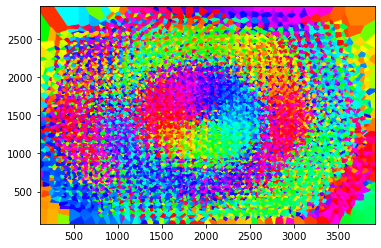

In [7]:
img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.projectPoints_and_cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
plt.show()

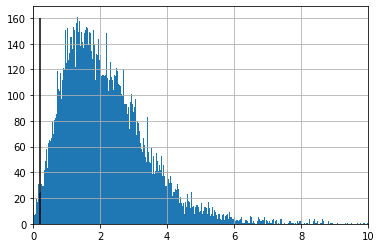

In [21]:
plt.hist(mag_all, bins=1000)
plt.vlines(0.2, 0, 160)
plt.grid()
plt.xlim(0,10)
plt.show()

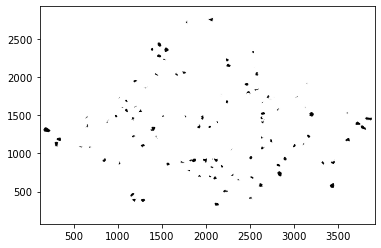

In [18]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, mag_all, angles=False, magnitude_treshold=0.2)
plt.show()

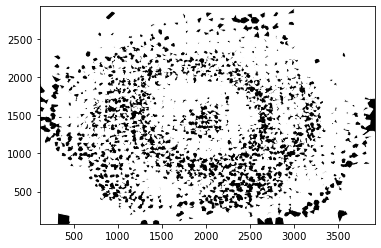

In [19]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, mag_all, angles=False, magnitude_treshold=1)
plt.show()

## 14 distCoeffs

In [8]:
calibrate_retval_14, cameraMatrix_14, distCoeffs_14, rvecs_14, tvecs_14, stdDeviationsIntrinsics_14, stdDeviationsExtrinsics_14, perViewErrors_14, charucoCorners_all_14, charucoIds_all_14, markerCorners_all_14, \
    armarkerIds_all_14, obj_points_all_14, board_14 = flexiblecc.Parametric.calibrate_camera_charuco(gray_imgs, squaresX, squaresY, squareLength, markerLength, dictionary)

In [12]:
calibrate_retval_14

2.4864259619888847

In [9]:
distCoeffs_14

array([[ 4.97642627e-01,  1.68110611e+00, -1.44136434e-02,
        -2.61642346e-02,  8.30654033e+00,  2.81952162e-01,
         2.76156131e+00,  6.65554703e+00,  2.75438270e-02,
        -4.65611685e-03,  1.64618900e-02,  8.02726746e-04,
         2.06355869e-02, -4.63539968e-02]])

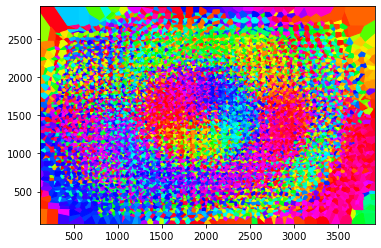

In [10]:
img_points_all_14, diff_all_14, angels_all_14, mag_all_14 = flexiblecc.Metrics.voronoi.projectPoints_and_cal_angles_and_mag(charucoCorners_all_14, obj_points_all_14, rvecs_14, tvecs_14, cameraMatrix_14, distCoeffs_14)
    
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, angels_all_14)
plt.show()

# Ny methode

In [28]:
import sys
sys.path.append("../")

import glob
import flexiblecc
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [29]:
file = r"C:\Users\SimonLBS\Downloads\residuals_and_points_2D_2020-05-09_22-32-50.npy"

In [30]:
ar = np.load(file, allow_pickle=True)

In [31]:
_, project_points, image_points = ar

In [32]:
image_points = np.concatenate(image_points)
project_points = np.concatenate(project_points)

In [33]:
imp, diff, angels, mag = flexiblecc.Metrics.voronoi.cal_angles_and_mag(image_points, project_points)

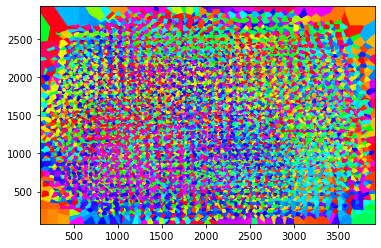

In [28]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, angels)
plt.show()

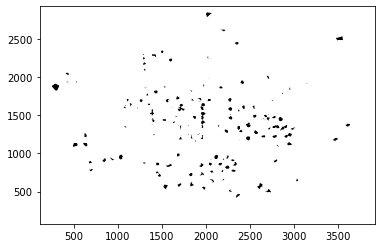

In [30]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=0.2)
plt.show()

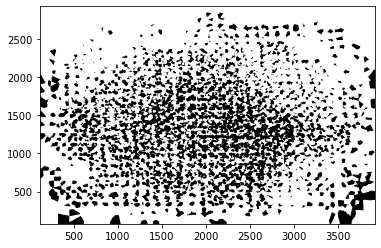

In [29]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=1)
plt.show()

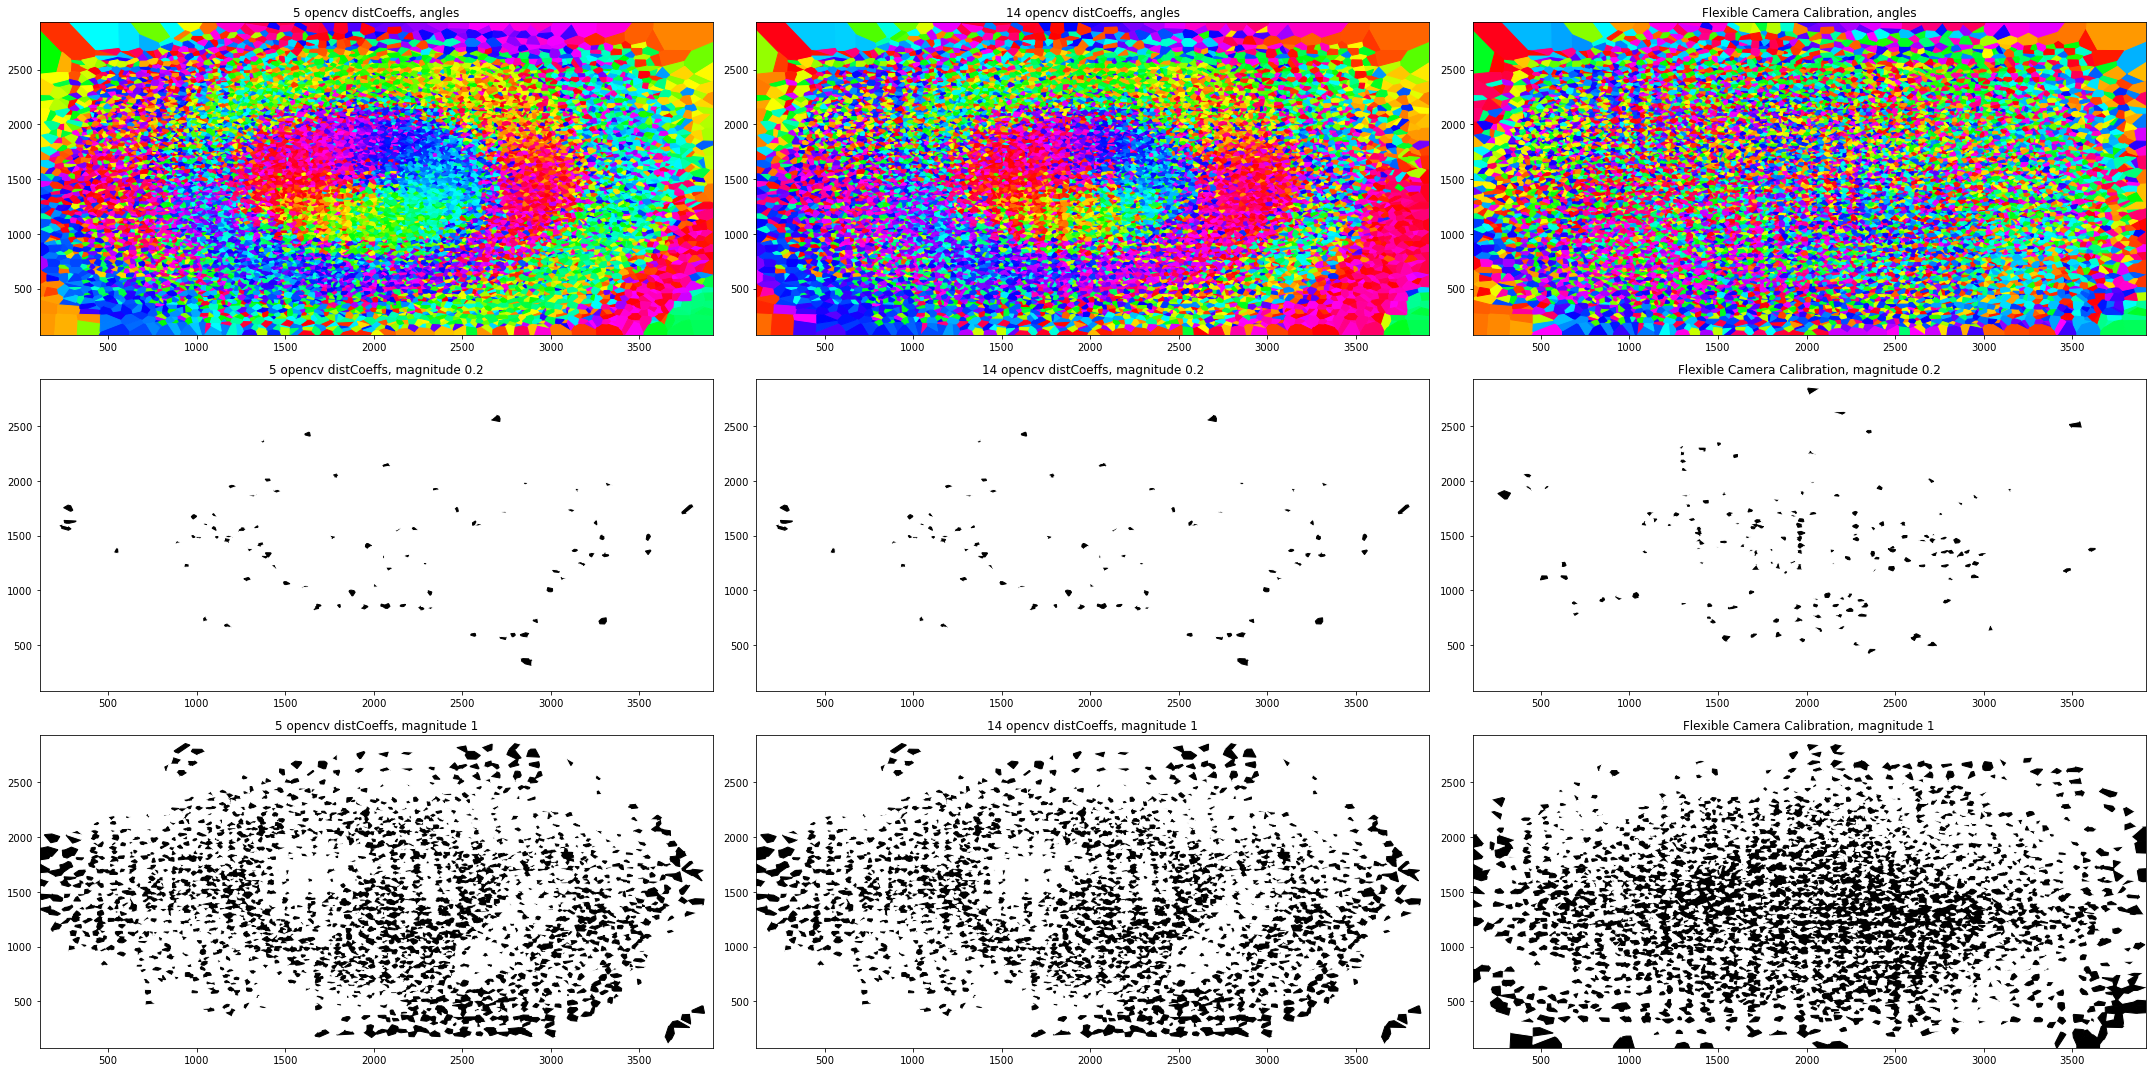

In [37]:
plt.figure(figsize=(30,5*3))
ax = plt.subplot(331)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all, ax=ax)
plt.title("5 opencv distCoeffs, angles")
ax = plt.subplot(332)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, angels_all_14, ax=ax)
plt.title("14 opencv distCoeffs, angles")
ax = plt.subplot(333)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, angels, ax=ax)
plt.title("Flexible Camera Calibration, angles")

ax = plt.subplot(334)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=0.2)
plt.title("5 opencv distCoeffs, magnitude 0.2")
ax = plt.subplot(335)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=0.2)
plt.title("14 opencv distCoeffs, magnitude 0.2")
ax = plt.subplot(336)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=0.2)
plt.title("Flexible Camera Calibration, magnitude 0.2")


ax = plt.subplot(337)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=1)
plt.title("5 opencv distCoeffs, magnitude 1")
ax = plt.subplot(338)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=1)
plt.title("14 opencv distCoeffs, magnitude 1")
ax = plt.subplot(339)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=1)
plt.title("Flexible Camera Calibration, magnitude 1")

plt.tight_layout()
plt.savefig("good_plot.svg")
plt.show()

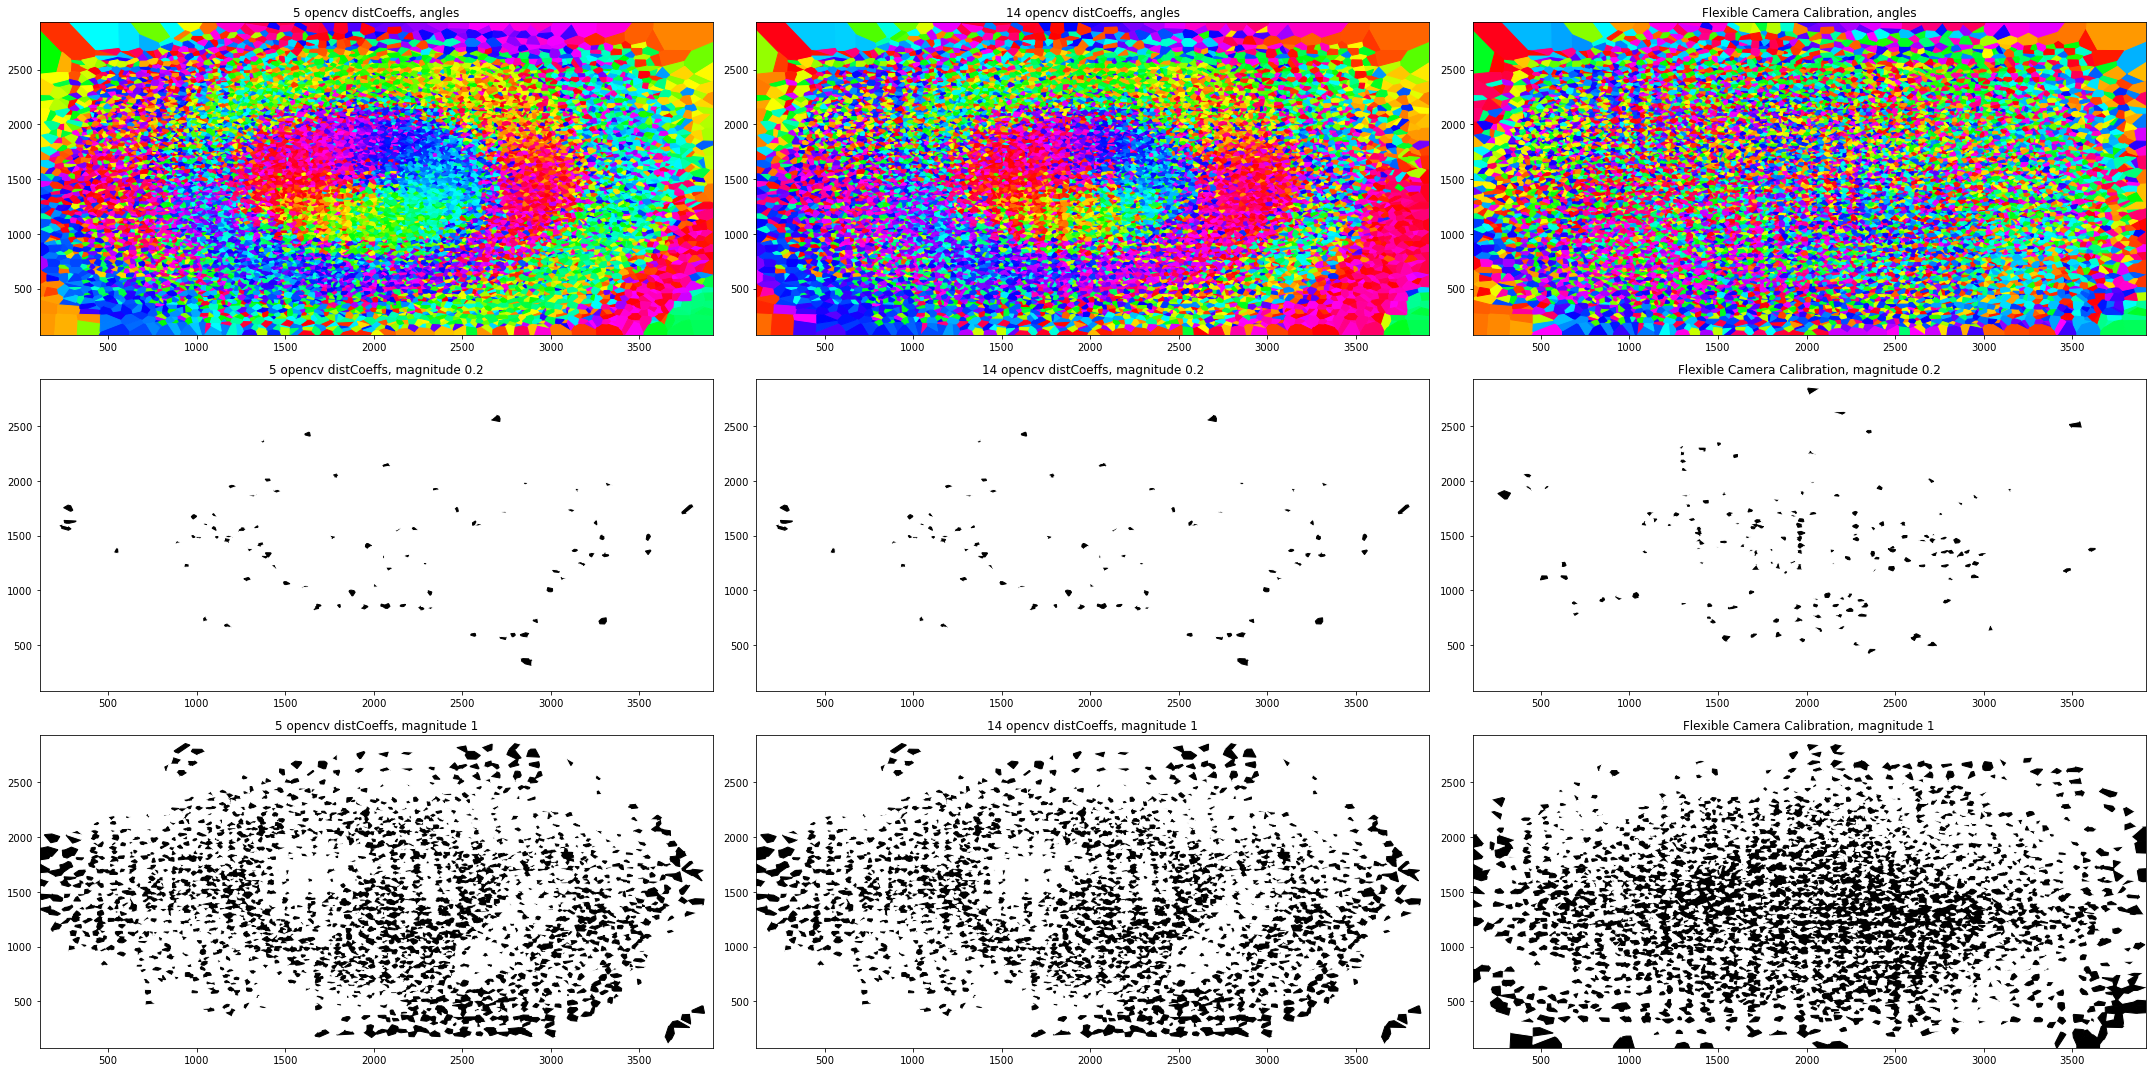

In [38]:
plt.figure(figsize=(30,5*3))
ax = plt.subplot(331)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all, ax=ax)
plt.title("5 opencv distCoeffs, angles")
ax = plt.subplot(332)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, angels_all_14, ax=ax)
plt.title("14 opencv distCoeffs, angles")
ax = plt.subplot(333)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, angels, ax=ax)
plt.title("Flexible Camera Calibration, angles")

ax = plt.subplot(334)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=0.2)
plt.title("5 opencv distCoeffs, magnitude 0.2")
ax = plt.subplot(335)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=0.2)
plt.title("14 opencv distCoeffs, magnitude 0.2")
ax = plt.subplot(336)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=0.2)
plt.title("Flexible Camera Calibration, magnitude 0.2")


ax = plt.subplot(337)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=1)
plt.title("5 opencv distCoeffs, magnitude 1")
ax = plt.subplot(338)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, mag_all_14, angles=False, magnitude_treshold=1)
plt.title("14 opencv distCoeffs, magnitude 1")
ax = plt.subplot(339)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=1)
plt.title("Flexible Camera Calibration, magnitude 1")

plt.tight_layout()
plt.savefig("good_plot.png")
plt.show()

In [69]:
cm = flexiblecc.BSpline.central_model.cm_load(r"S:\Programming\Studet\FCC\Test\TestRes\59e302b5-79f6-449c-a1cb-a025600cce0b\cm.npz")

In [90]:
xx, yy = np.meshgrid(cm.th*cm.image_width, cm.tv*cm.image_height)

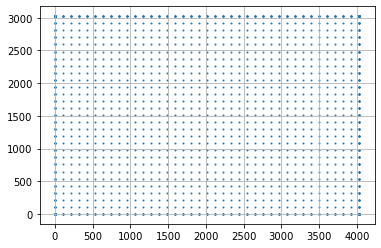

In [96]:
plt.scatter(xx, yy, s=1)
plt.grid()

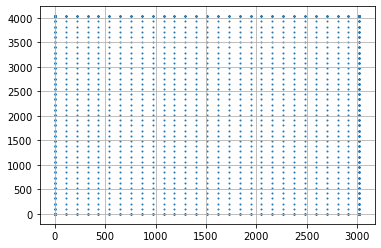

In [97]:
plt.scatter(yy, xx, s=1)
plt.grid()

In [75]:
residuals_2D, estimated_points_2D, correct_points_2D = np.load(r"S:\Programming\Studet\FCC\Test\TestRes\59e302b5-79f6-449c-a1cb-a025600cce0b\calc_residuals_2D.npy", allow_pickle=True)

In [77]:
image_points = np.concatenate(correct_points_2D)
project_points = np.concatenate(estimated_points_2D)
imp, diff, angels, mag = flexiblecc.Metrics.voronoi.cal_angles_and_mag(image_points, project_points)

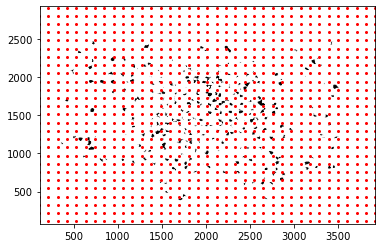

In [93]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=1)
plt.plot(xx, yy, "o", color="red", markersize=2)
plt.show()

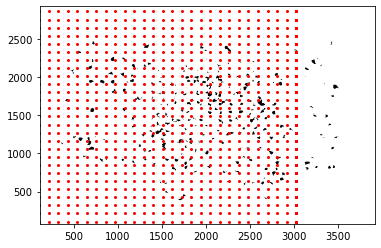

In [94]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, mag, angles=False, magnitude_treshold=1)
plt.plot(yy, xx, "o", color="red", markersize=2)
plt.show()

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

import glob
import flexiblecc
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [3]:
data_set = "CalImgs/ChArUco - Sorted/Samsung Galaxy S10 Plus/WideAngle/Fold_0"

In [4]:
datasetpath = "../"+data_set+"/*.jpg"

In [5]:
image_files = glob.glob(datasetpath)

In [6]:
color_images = [cv2.imread(f) for f in tqdm(image_files)]
gayscale_images = [cv2.cvtColor(c_img, cv2.COLOR_BGR2GRAY) for c_img in tqdm(color_images)]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 483.76it/s]


In [7]:
image_shape = color_images[0].shape[:2]

In [8]:
import flexiblecc.Parametric as parcc

In [9]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

In [10]:
calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, \
    perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all, board = parcc.calibrate_camera_charuco(gayscale_images, squaresX, squaresY,
                                                                                                                                                  squareLength, markerLength, dictionary, verbose=1)

  0%|                                                                                                                                                                                                                                         | 0/30 [00:00<?, ?image/s]

Finding charuco features


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:05<00:00,  5.81image/s]


Doing camera calibrate
Calibration done


In [11]:
def undistort(points):
    return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)

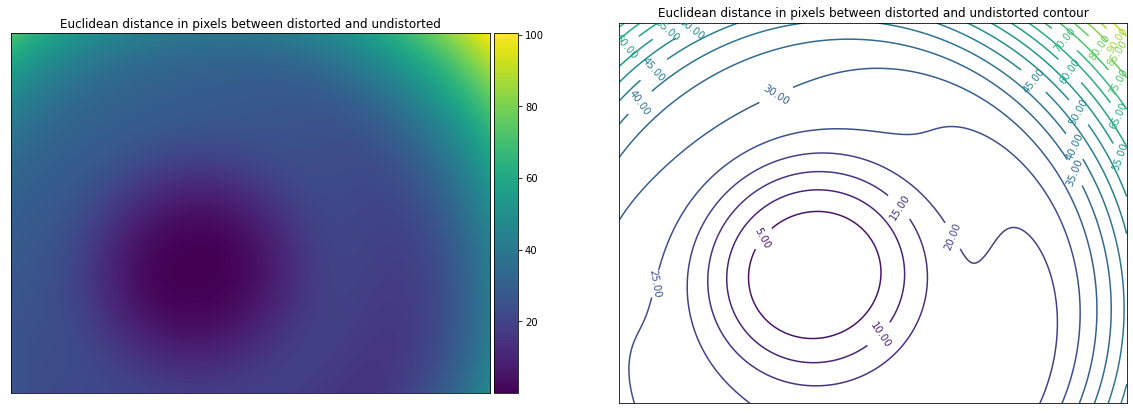

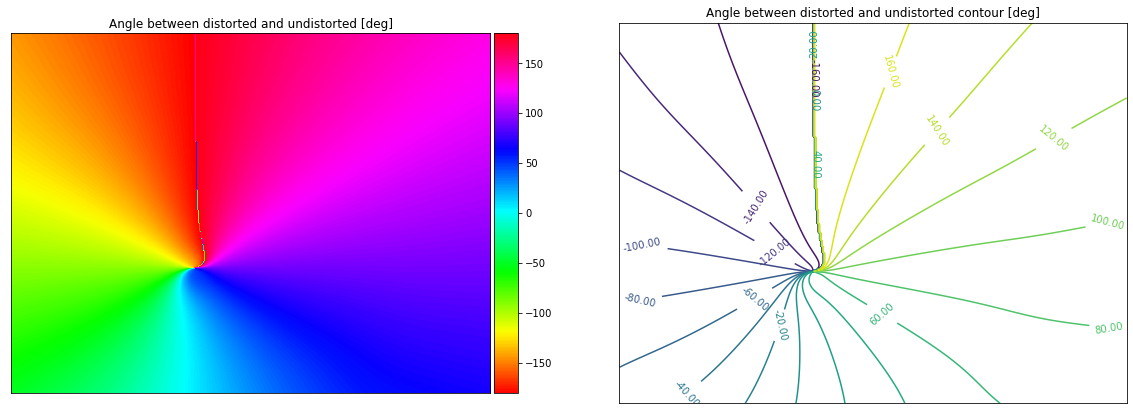

In [17]:
flexiblecc.Metrics.plot_distort(undistort, image_shape, contour_n_levels=20)